## En este notebook vamos ver cómo aplicar los diferentes algoritmos de clustering a la data de iris

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Esta dataset se podía cargar directamente de scikit, dentro del módulo datasets

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
#Cargo los datos
data = load_iris()

In [ ]:
#Defino la matriz de features
X = data.data


In [ ]:
#Defino el vector de targets
y = data.target

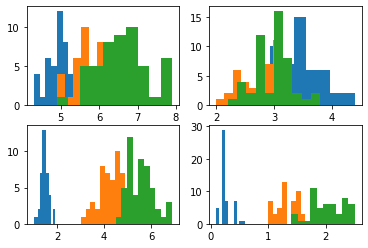

In [ ]:
#Miro la distribución de las clases para cada variable mediante histogramas

fig, axs= plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

for i in range(X.shape[1]):
    
    axs[i].hist(X[y==0,i])
    axs[i].hist(X[y==1,i])
    axs[i].hist(X[y==2,i])

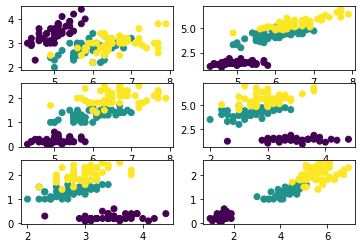

In [ ]:
# También usando scatter plots
fig, axs= plt.subplots(nrows=3, ncols=2)
axs = axs.flatten()

axs[0].scatter(X[:,0],X[:,1], c = y)
axs[1].scatter(X[:,0],X[:,2], c = y)
axs[2].scatter(X[:,0],X[:,3], c = y)
axs[3].scatter(X[:,1],X[:,2], c = y)
axs[4].scatter(X[:,1],X[:,3], c = y)
axs[5].scatter(X[:,2],X[:,3], c = y)

# Sin PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")


Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


# Con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)
pca.get_covariance()

array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

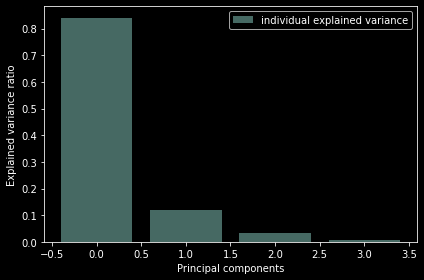

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


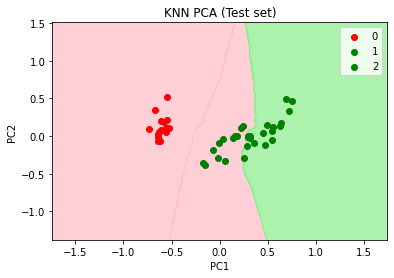

In [ ]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()